# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print(df_data.shape)
df_data.head()

(4324, 9)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [9]:
df_data.duplicated().values.any()

False

In [10]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [11]:
df_data_clean = df_data.dropna()

In [12]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


## Descriptive Statistics

In [13]:
df_data_clean.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
launches_by_organization = df_data_clean['Organisation'].value_counts().reset_index()
launches_by_organization.columns = ['Organisation', 'Number of Launches']

launches_by_organization = launches_by_organization.sort_values(by='Number of Launches', ascending=False)
launches_by_organization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Organisation        25 non-null     object
 1   Number of Launches  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


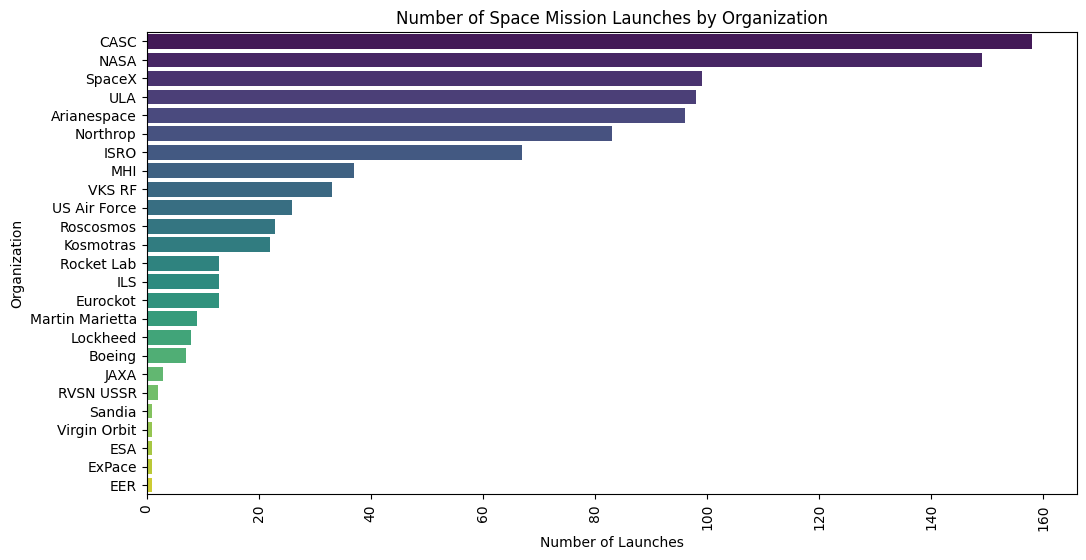

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Launches', y='Organisation', data=launches_by_organization, palette='viridis')
plt.title('Number of Space Mission Launches by Organization')
plt.xlabel('Number of Launches')
plt.ylabel('Organization')
plt.xticks(rotation=90)

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [16]:
rocket_status_counts = df_data_clean['Rocket_Status'].value_counts()

In [17]:
print("Number of Active Rockets:", rocket_status_counts.get('StatusActive', 0))
print("Number of Retired Rockets:", rocket_status_counts.get('StatusRetired', 0))

Number of Active Rockets: 586
Number of Retired Rockets: 378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mission_status_counts = df_data_clean['Mission_Status'].value_counts()

In [19]:
print("Number of Successful Missions:", mission_status_counts.get('Success', 0))
print("Number of Failed Missions:", mission_status_counts.get('Failure', 0))

Number of Successful Missions: 910
Number of Failed Missions: 36


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [20]:
launch_prices = pd.to_numeric(df_data_clean['Price'], errors='coerce')

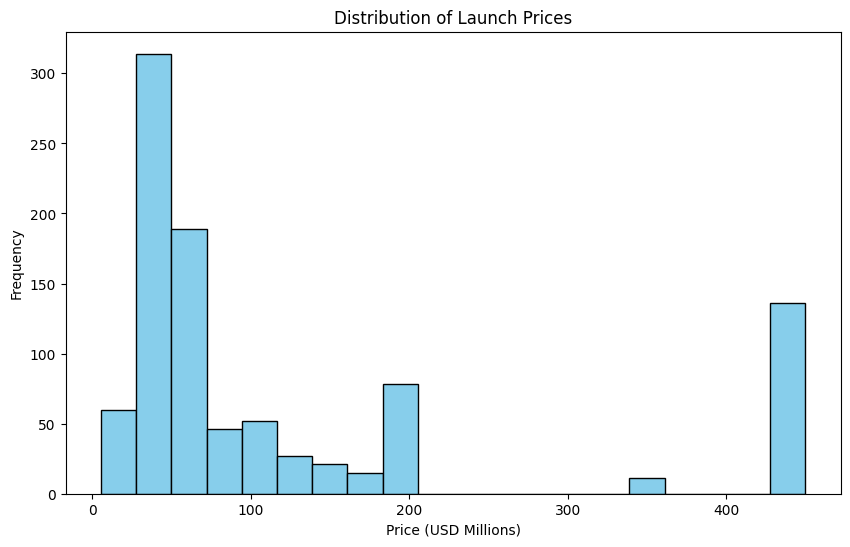

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(launch_prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Launch Prices')
plt.xlabel('Price (USD Millions)')
plt.ylabel('Frequency')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [22]:
country_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
}

# Extract the country from the 'Location' column
df_data_clean['Country'] = df_data_clean['Location'].str.extract(r'([^,]*$)')
df_data_clean['Country'] = df_data_clean['Country'].str.strip()

print(df_data_clean.Country.value_counts())

def get_alpha3(country_name):
    try:
        country = countries.get(country_name)
        return country.alpha3
    except KeyError:
        return None

# Update the 'Country' column with the corresponding country codes
df_data_clean['Country_Code'] = df_data_clean['Country'].map(country_mapping)
df_data_clean['Country_Code'].fillna(df_data_clean['Country'], inplace=True)
df_data_clean['Country_Code'] = df_data_clean['Country_Code'].apply(get_alpha3)


# Group the data by country code and count the number of launches
launches_by_country = df_data_clean['Country_Code'].value_counts().reset_index()
launches_by_country.columns = ['Country_Code', 'Number of Launches']
launches_by_country.head()

USA                               487
China                             158
France                             95
India                              67
Russia                             54
Kazakhstan                         46
Japan                              40
New Zealand                        13
Gran Canaria                        2
Yellow Sea                          1
Pacific Missile Range Facility      1
Name: Country, dtype: int64


<ipython-input-22-7bb1b6e9e7e2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Country'] = df_data_clean['Location'].str.extract(r'([^,]*$)')
<ipython-input-22-7bb1b6e9e7e2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clean['Country'] = df_data_clean['Country'].str.strip()
<ipython-input-22-7bb1b6e9e7e2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Country_Code,Number of Launches
0,USA,490
1,CHN,159
2,FRA,95
3,IND,67
4,RUS,54


In [23]:
fig = px.choropleth(
    launches_by_country,
    locations='Country_Code',
    color='Number of Launches',
    color_continuous_scale=px.colors.sequential.Plasma,  # Adjust the color scale
    title='Number of Space Mission Launches by Country',
    labels={'Number of Launches': 'Launches'},
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [24]:
failures_by_country = df_data_clean[df_data_clean['Mission_Status'] == 'Failure']['Country_Code'].value_counts().reset_index()
failures_by_country.columns = ['Country_Code', 'Number of Failures']

In [25]:
import plotly.express as px

fig = px.choropleth(failures_by_country,
                    locations="Country_Code",
                    color="Number of Failures",
                    hover_name="Country_Code",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    title="Number of Failures by Country")

fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [26]:
sunburst_data = df_data_clean.groupby(['Country_Code', 'Organisation', 'Mission_Status']).size().reset_index(name='Counts')

In [27]:
fig = px.sunburst(sunburst_data, path=['Country_Code', 'Organisation', 'Mission_Status'], values='Counts')

fig.update_layout(title_text='Sunburst Chart of Countries, Organisations, and Mission Status')

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [28]:
df_data_clean['Price'] = df_data_clean['Price'].str.replace(',', '').str.extract(r'(\d+.\d+)').astype(float)

<ipython-input-28-7e7af2999552>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
money_spent_by_org = df_data_clean.groupby('Organisation')['Price'].sum().reset_index()
money_spent_by_org = money_spent_by_org.sort_values(by='Price', ascending=False)

In [31]:
print(money_spent_by_org.head())

   Organisation     Price
14         NASA 76,280.00
0   Arianespace 16,345.00
21          ULA 14,798.00
16    RVSN USSR 10,000.00
2          CASC  6,340.26


# Analyse the Amount of Money Spent by Organisation per Launch

In [32]:
df_data_clean['Cost_Per_Launch'] = df_data_clean['Price'] / df_data_clean['Organisation'].map(df_data_clean['Organisation'].value_counts())

<ipython-input-32-3439874173c2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
cost_per_launch_by_org = df_data_clean.groupby('Organisation')['Cost_Per_Launch'].mean().reset_index()
cost_per_launch_by_org = cost_per_launch_by_org.sort_values(by='Cost_Per_Launch', ascending=False)

In [34]:
print(cost_per_launch_by_org.head())

   Organisation  Cost_Per_Launch
16    RVSN USSR         2,500.00
4           ESA            37.00
6        ExPace            28.30
1        Boeing            25.33
3           EER            20.00


# Chart the Number of Launches per Year

In [40]:
df_data_clean['Date'] = pd.to_datetime(df_data_clean['Date'], utc=True).dt.tz_convert(None)
df_data_clean['Launch_Year'] = df_data_clean['Date'].dt.year

launches_per_year = df_data_clean['Launch_Year'].value_counts().reset_index()
launches_per_year.columns = ['Year', 'Number of Launches']
launches_per_year = launches_per_year.sort_values(by='Year')


<ipython-input-40-3bd4437d312f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-3bd4437d312f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



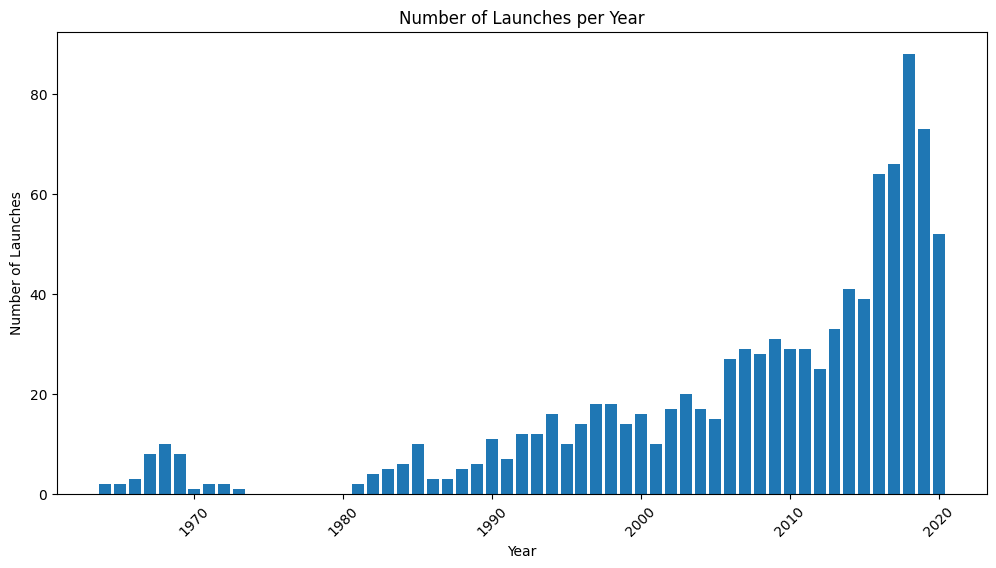

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(launches_per_year['Year'], launches_per_year['Number of Launches'])
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.xticks(rotation=45)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [44]:
df_data_clean['Date'] = pd.to_datetime(df_data_clean['Date'], utc=True).dt.tz_convert(None)

df_data_clean['Year'] = df_data_clean['Date'].dt.year
df_data_clean['Month'] = df_data_clean['Date'].dt.month

launches_monthly = df_data_clean.groupby(['Year', 'Month'])['Location'].count().reset_index()
launches_monthly.columns = ['Year', 'Month', 'Number of Launches']

rolling_average = launches_monthly['Number of Launches'].rolling(window=12).mean()

max_month = launches_monthly[launches_monthly['Number of Launches'] == launches_monthly['Number of Launches'].max()]


<ipython-input-44-41d392a98068>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-41d392a98068>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-41d392a98068>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



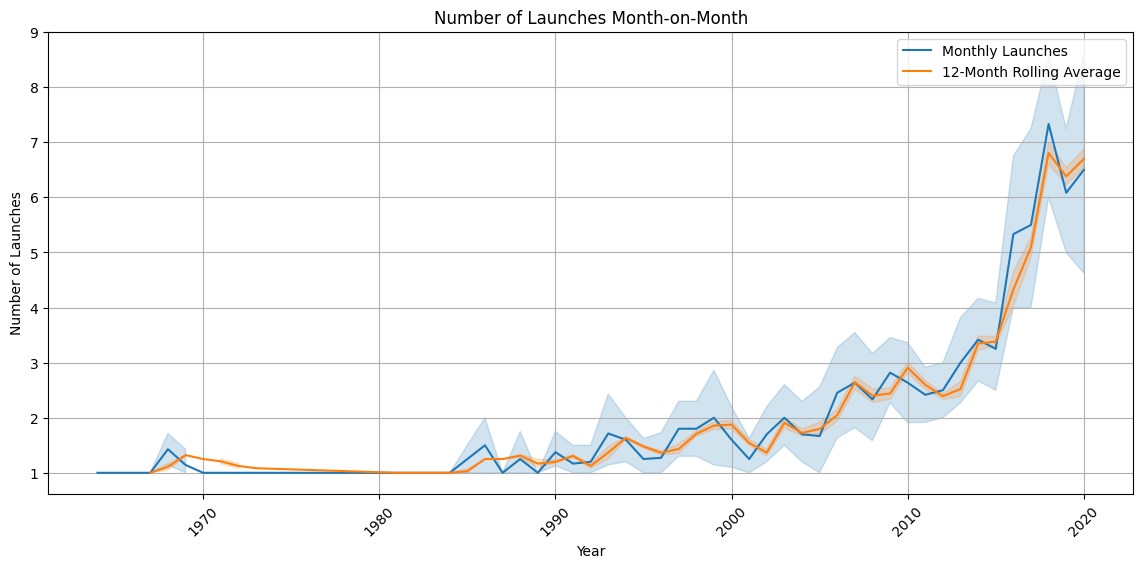

Month with the highest number of launches:
     Year  Month  Number of Launches
349  2017      6                  12
386  2020      7                  12


In [45]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Number of Launches', data=launches_monthly, label='Monthly Launches')
sns.lineplot(x='Year', y=rolling_average, data=launches_monthly, label='12-Month Rolling Average')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Month-on-Month')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

print("Month with the highest number of launches:")
print(max_month)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [47]:
df_data_clean['Date'] = pd.to_datetime(df_data_clean['Date'], utc=True).dt.tz_convert(None)

df_data_clean['Month'] = df_data_clean['Date'].dt.month

launches_per_month = df_data_clean['Month'].value_counts().reset_index()
launches_per_month.columns = ['Month', 'Number of Launches']
launches_per_month = launches_per_month.sort_values(by='Month')

<ipython-input-47-f1f187fbc070>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-f1f187fbc070>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



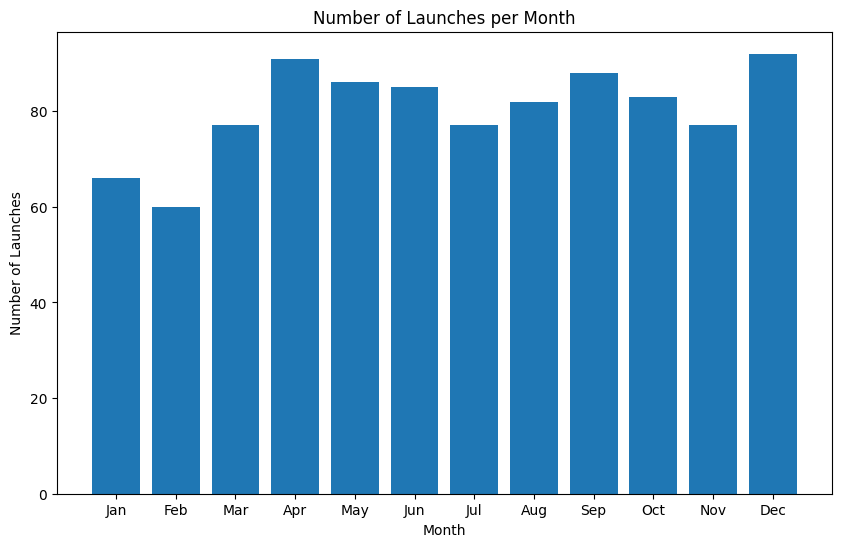

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(launches_per_month['Month'], launches_per_month['Number of Launches'])
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [53]:
df_data_clean['Date'] = pd.to_datetime(df_data_clean['Date'], utc=True).dt.tz_convert(None)

df_data_clean['Year'] = df_data_clean['Date'].dt.year

average_launch_price = df_data_clean.groupby('Year')['Price'].mean()

<ipython-input-53-34f7cf48374b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-34f7cf48374b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



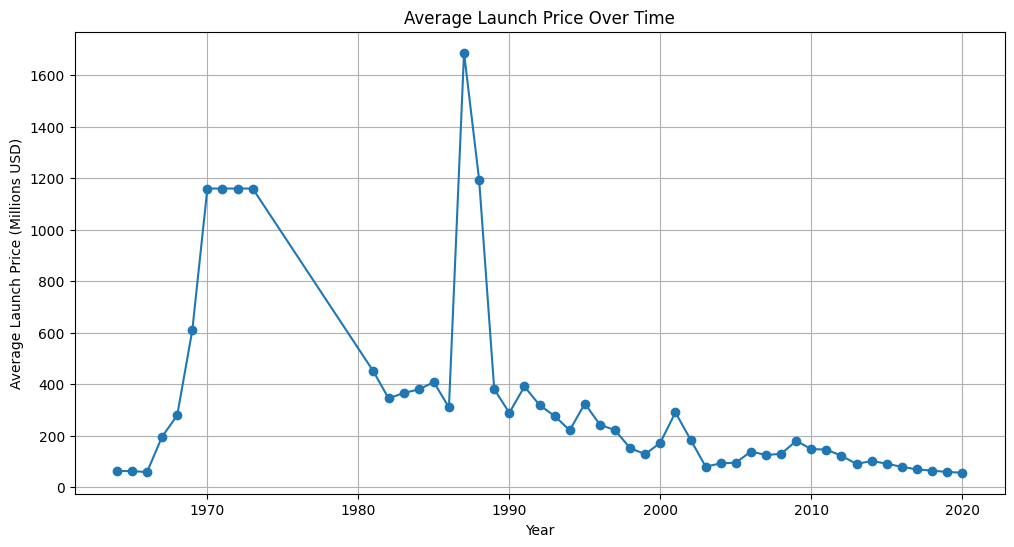

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(average_launch_price.index, average_launch_price.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Launch Price (Millions USD)')
plt.title('Average Launch Price Over Time')
plt.grid()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [55]:
top_10_organizations = df_data_clean['Organisation'].value_counts().head(10).index

df_top_10 = df_data_clean[df_data_clean['Organisation'].isin(top_10_organizations)]

launches_by_organization = df_top_10.groupby(['Year', 'Organisation']).size().unstack()

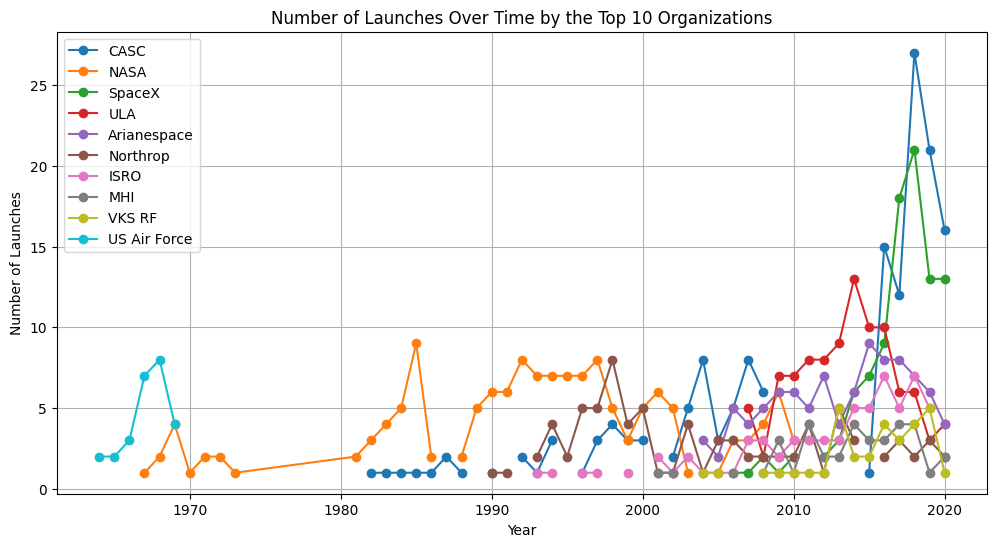

In [56]:
plt.figure(figsize=(12, 6))
for organization in top_10_organizations:
    plt.plot(launches_by_organization.index, launches_by_organization[organization], label=organization, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time by the Top 10 Organizations')
plt.legend(loc='best')
plt.grid()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [59]:
start_year = df_data_clean['Year'].min()
end_year = 1991

cold_war_data = df_data_clean[(df_data_clean['Year'] >= start_year) & (df_data_clean['Year'] <= end_year)]

launches_by_country = cold_war_data.groupby(['Year', 'Country_Code']).size().unstack()

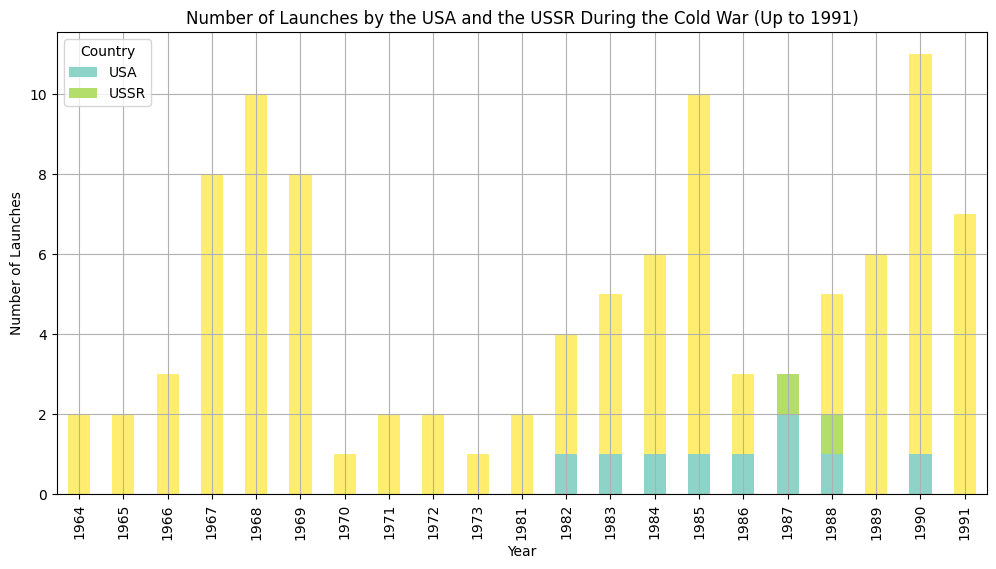

In [60]:
plt.figure(figsize=(12, 6))
launches_by_country.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches by the USA and the USSR During the Cold War (Up to 1991)')
plt.legend(title='Country', labels=['USA', 'USSR'])
plt.grid()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [61]:
us_and_ussr_data = df_data_clean[df_data_clean['Country_Code'].isin(['USA', 'RUS', 'KAZ'])]

launches_by_country = us_and_ussr_data['Country_Code'].value_counts().reset_index()
launches_by_country.columns = ['Country', 'Number of Launches']

In [62]:
fig = px.pie(launches_by_country, values='Number of Launches', names='Country', title='Total Number of Launches: USA vs. USSR (including Kazakhstan)')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [64]:
superpowers_data = df_data_clean[df_data_clean['Country_Code'].isin(['USA', 'RUS'])]

launches_by_superpower = superpowers_data.groupby(['Year', 'Country_Code']).size().unstack().fillna(0)

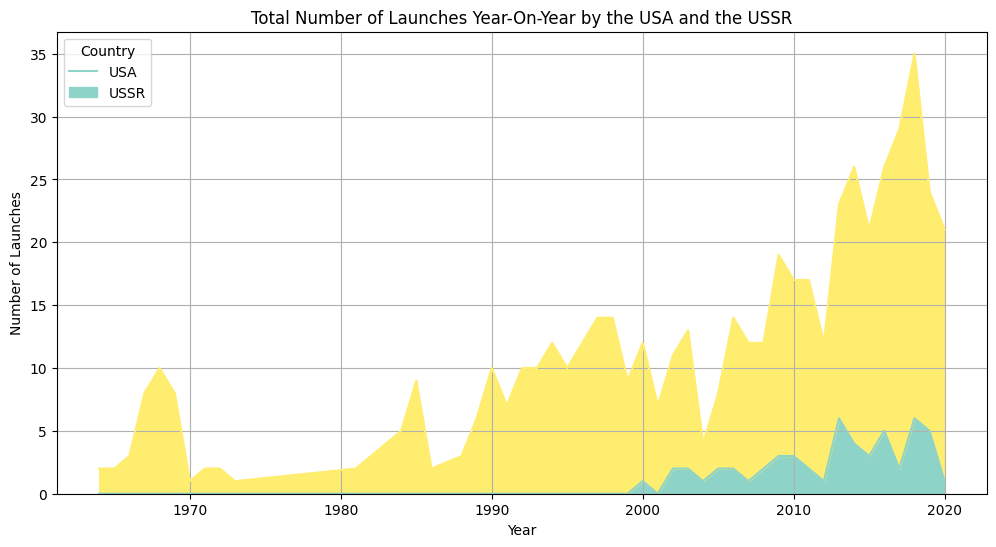

In [65]:
plt.figure(figsize=(12, 6))
launches_by_superpower.plot(kind='area', colormap='Set3', ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Total Number of Launches Year-On-Year by the USA and the USSR')
plt.legend(title='Country', labels=['USA', 'USSR'])
plt.grid()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [66]:
failed_missions_data = df_data_clean[df_data_clean['Mission_Status'] == 'Failure']

mission_failures_by_year = failed_missions_data['Year'].value_counts().sort_index()

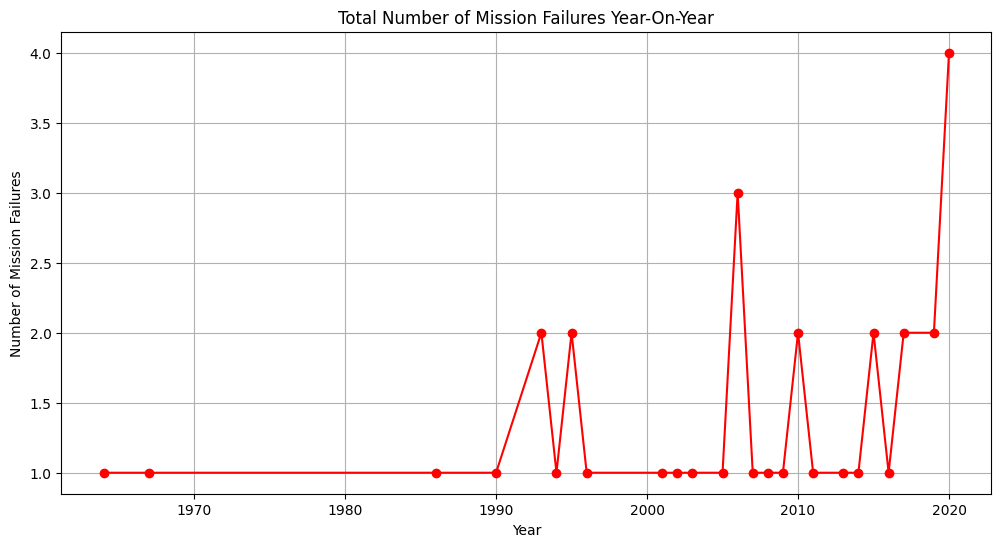

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(mission_failures_by_year.index, mission_failures_by_year.values, marker='o', color='red')

plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.title('Total Number of Mission Failures Year-On-Year')
plt.grid()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [69]:
launches_by_year = df_data_clean['Year'].value_counts().sort_index()
failures_by_year = df_data_clean[df_data_clean['Mission_Status'] == 'Failure']['Year'].value_counts().sort_index()

failure_percentage_by_year = (failures_by_year / launches_by_year) * 100

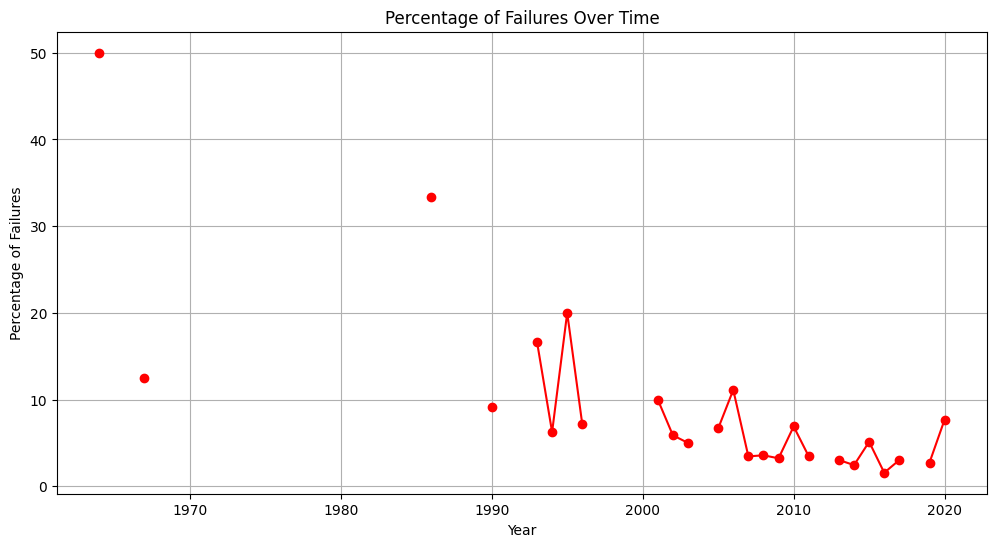

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(failure_percentage_by_year.index, failure_percentage_by_year.values, marker='o', color='red')

plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.title('Percentage of Failures Over Time')
plt.grid()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches?

In [71]:
data_up_to_2020 = df_data_clean[df_data_clean['Year'] <= 2020]

total_launches_by_country = data_up_to_2020.groupby(['Year', 'Country'])['Organisation'].count().unstack(fill_value=0)

leading_country_by_year = total_launches_by_country.idxmax()

print(leading_country_by_year)

Country
China                             2018
France                            2015
Gran Canaria                      1997
India                             2016
Japan                             2018
Kazakhstan                        2019
New Zealand                       2019
Pacific Missile Range Facility    2015
Russia                            2013
USA                               2018
Yellow Sea                        2019
dtype: int64


In [72]:
successful_data_up_to_2020 = data_up_to_2020[data_up_to_2020['Mission_Status'] == 'Success']

total_successful_launches_by_country = successful_data_up_to_2020.groupby(['Year', 'Country'])['Organisation'].count().unstack(fill_value=0)

leading_country_by_year_successful = total_successful_launches_by_country.idxmax()

print(leading_country_by_year_successful)

Country
China           2018
France          2015
Gran Canaria    1997
India           2016
Japan           2018
Kazakhstan      2019
New Zealand     2019
Russia          2018
USA             2018
Yellow Sea      2019
dtype: int64


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

<ipython-input-93-c1092b01df05>:5: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



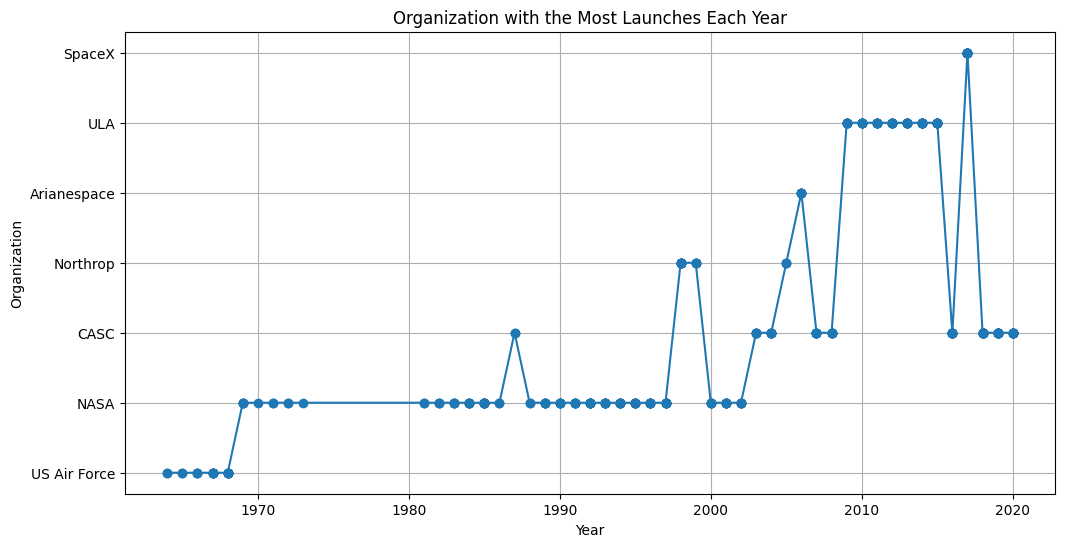

In [93]:
most_launched_each_year = df_data_clean.groupby('Year')['Organisation'].agg(lambda x: x.value_counts().idxmax())

results = pd.DataFrame()

for year, organization in most_launched_each_year.iteritems():
    year_data = df_data_clean[df_data_clean['Year'] == year]
    org_data = year_data[year_data['Organisation'] == organization]
    results = pd.concat([results, org_data], axis=0)

plt.figure(figsize=(12, 6))
plt.plot(results['Year'], results['Organisation'], marker='o')

plt.xlabel('Year')
plt.ylabel('Organization')
plt.title('Organization with the Most Launches Each Year')
plt.grid()
plt.show()